# Python
В файле `task.csv` хранится таблица с рекламными событиями. События в таблице описываются следующими полями:

- `typeevent`: тип события (18 - показ баннера, 95 - клик по баннеру)
- `uniqid`: идентификатор пользователя
- `_date`: день, в который произошло событие
- `bannerid`: ID баннера, по которому произошел показ/клик

На основе имеющихся данных ответьте на вопросы:

1. [В какой из дней был максимальный CTR?](#step1)
2. [Чему равно минимальное значение DAU?](#step2)
3. [Чему равно медианное число показов на одного пользователя?](#step3)
4. [Все `uniqid` состоят из 4 цифр. Какая цифра чаще всего встречается на 2 позиции (индексация с нуля) поля `uniqid` в логе?*](#step4)
5. [Как много пар {пользователь; баннер} таких, что число кликов для них больше, чем число показов?*](#step5)
6. [Сделайте график кликов по дням. Обязательно добавьте: название графика, подписи осей, добавьте сетку.](#step6)


### Шаг 0: Получение данных и подгрузка необходимых библиотек

In [3]:
# Импортируем необходимые библиотеки
import pandas as pd
#!pip install matplotlib
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: C:\Users\user3048\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Загрузим данные из файла task.csv
data = pd.read_csv('task.csv')

# Посмотрим на первые несколько строк данных
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   typeevent  1048574 non-null  int64 
 1   bannerid   1048574 non-null  int64 
 2   _date      1048574 non-null  object
 3   uniqid     1048574 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 32.0+ MB


,typeevent,bannerid,_date,uniqid
0,18,157626912,2021-06-02,7497
1,18,157703675,2021-06-01,8343
2,18,157703675,2021-06-02,9627
3,18,157703675,2021-06-01,8429
4,18,157703675,2021-06-02,8488


Данные полны и корректны. Можно приступать к заданию.

### Шаг 1: В какой из дней был максимальный CTR? <a id='step1'></a>

In [5]:
# Фильтруем данные по типам событий
impressions = data[data['typeevent'] == 18]
clicks = data[data['typeevent'] == 95]

# Группируем данные по дате и считаем количество событий
impressions_count = impressions.groupby('_date').size()
clicks_count = clicks.groupby('_date').size()

# Объединяем данные по датам
ctr_data = pd.DataFrame({
    'impressions': impressions_count,
    'clicks': clicks_count
}).fillna(0)  # Заполняем отсутствующие значения нулями

# Вычисляем CTR
ctr_data['CTR'] = (ctr_data['clicks'] / ctr_data['impressions']) * 100

ctr_data

,impressions,clicks,CTR
_date,,,
2021-06-01,233421,3370,1.443743
2021-06-02,261637,3467,1.325118
2021-06-03,267152,3415,1.278298
2021-06-04,272754,3358,1.231146


CTR выше за 2021-06-01.

### Шаг 2: Чему равно минимальное значение DAU? <a id='step2'></a>

In [6]:
dau_data = data.groupby('_date')['uniqid'].nunique()
dau_data

_date
2021-06-01    8999
2021-06-02    8999
2021-06-03    8999
2021-06-04    8999
Name: uniqid, dtype: int64

Если считать активными пользователями всех, кто хотя бы видел баннер, то показатели равны. Посчитаем DAU, принимая за активных только тех, кто кликал по баннеру

In [7]:
dau_clicks_data = clicks.groupby('_date')['uniqid'].nunique()
dau_clicks_data

_date
2021-06-01    2793
2021-06-02    2905
2021-06-03    2868
2021-06-04    2824
Name: uniqid, dtype: int64

In [8]:
dau_clicks_data.min()

2793

Видим, что минимальное DAU равно 2793 и было достигнуто 2021-06-01

### Шаг 3: Чему равно медианное число показов на одного пользователя? <a id='step3'></a>

In [9]:
# Группируем данные по пользователю и считаем количество показов
user_impressions = impressions.groupby('uniqid').size()

# Находим медианное значение числа показов на одного пользователя
user_impressions.median()

115.0

В среднем каждый пользователь увидел баннер 115 раз.

### Шаг 4: Какая цифра чаще всего встречается на 2 позиции? <a id='step4'></a>

In [10]:
# Извлекаем третью цифру из 'uniqid' (индексация с нуля, поэтому берем индекс 2)
third_digit = data['uniqid'].astype(str).str[2]

# Подсчитываем количество вхождений каждой цифры
digit_counts = third_digit.value_counts().reset_index()
digit_counts.columns = ['Цифра', 'Количество']

digit_counts

,Цифра,Количество
0,6,105369
1,1,105324
2,7,104912
3,5,104842
4,0,104804
5,4,104753
6,2,104726
7,8,104652
8,9,104638
9,3,104554


Видим, что в целом цифры распределены равномерно, что ожидаемо

In [12]:
#Выведем самую частую цифру и количество её появлений
digit_counts.loc[digit_counts['Количество'].idxmax()]

Цифра              6
Количество    105369
Name: 0, dtype: object

Самой частой оказалось цифра 6 с количеством вхождений 105369

### Шаг 5: Как много пар {пользователь; баннер} таких, что число кликов для них больше, чем число показов? <a id='step5'></a>

In [18]:
# Группируем данные по пользователю и баннеру и считаем количество показов и кликов
user_banner_impressions = impressions.groupby(['uniqid', 'bannerid']).size().reset_index(name='impressions')
user_banner_clicks = clicks.groupby(['uniqid', 'bannerid']).size().reset_index(name='clicks')

# Объединяем данные по пользователям и баннерам
user_banner_data = pd.merge(user_banner_impressions, user_banner_clicks, on=['uniqid', 'bannerid'], how='outer').fillna(0)

# Находим случаи, где количество кликов больше или равно количеству показов
active_user_banner = user_banner_data[user_banner_data['clicks'] > user_banner_data['impressions']]

# Выводим количество таких случаев
(active_user_banner.shape[0], user_banner_data.shape[0])



(1195, 74105)

Искомое количество равно 1195, что не превышает 2% от общего числа пар.

### Шаг 6: График кликов по дням <a id='step6'></a>

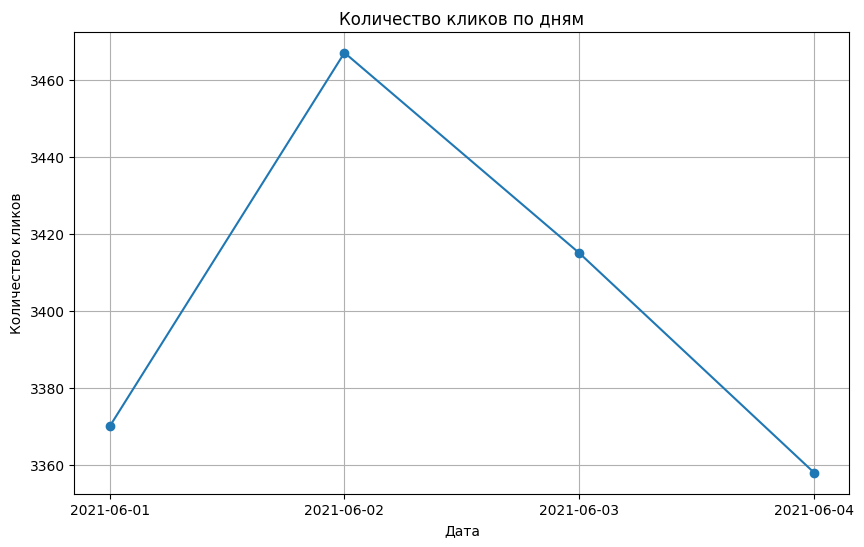

In [19]:
# Группируем данные по дате и считаем количество кликов
clicks_per_day = clicks.groupby('_date').size()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(clicks_per_day.index, clicks_per_day.values, marker='o')

# Добавляем название графика и подписи осей
plt.title('Количество кликов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество кликов')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()